# Visualizing Starbucks Stores Locations

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns; sns.set()

%matplotlib inline

In [2]:
# Load data
df = pd.read_csv('Starbucks.csv')
df.head()

In [3]:
df.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           25600 non-null  object 
 1   Store Number    25600 non-null  object 
 2   Store Name      25600 non-null  object 
 3   Ownership Type  25600 non-null  object 
 4   Street Address  25598 non-null  object 
 5   City            25585 non-null  object 
 6   State/Province  25600 non-null  object 
 7   Country         25600 non-null  object 
 8   Postcode        24078 non-null  object 
 9   Phone Number    18739 non-null  object 
 10  Timezone        25600 non-null  object 
 11  Longitude       25599 non-null  float64
 12  Latitude        25599 non-null  float64
dtypes: float64(2), object(11)
memory usage: 2.5+ MB


In [5]:
# Check the countries that have Starbucks
df.Country.unique()

array(['AD', 'AE', 'AR', 'AT', 'AU', 'AW', 'AZ', 'BE', 'BG', 'BH', 'BN',
       'BO', 'BR', 'BS', 'CA', 'CH', 'CL', 'CN', 'CO', 'CR', 'CW', 'CY',
       'CZ', 'DE', 'DK', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HU',
       'ID', 'IE', 'IN', 'JO', 'JP', 'KH', 'KR', 'KW', 'KZ', 'LB', 'LU',
       'MA', 'MC', 'MX', 'MY', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH',
       'PL', 'PR', 'PT', 'QA', 'RO', 'RU', 'SA', 'SE', 'SG', 'SK', 'SV',
       'TH', 'TR', 'TT', 'TW', 'US', 'VN', 'ZA'], dtype=object)

In [6]:
# Rank top 10 countries with most number of stores
df.Country.value_counts().head(10)

US    13608
CN     2734
CA     1468
JP     1237
KR      993
GB      901
MX      579
TW      394
TR      326
PH      298
Name: Country, dtype: int64

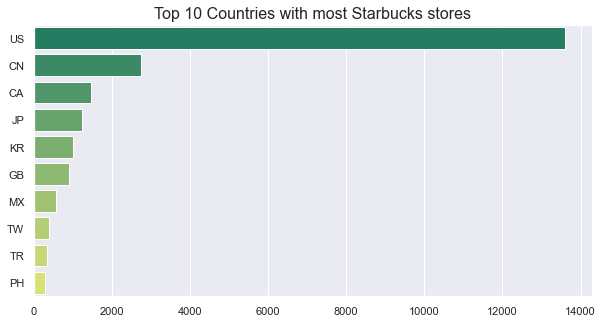

In [7]:
# Plot top 10 countries
top10 = df.Country.value_counts().head(10)
fig, ax = plt.subplots(figsize=(10,5))
ax=sns.barplot(y=top10.index, x=top10.values,
          ax=ax, orient="h", palette = "summer")
ax.set_title('Top 10 Countries with most Starbucks stores',
             fontsize=16);

In [8]:
# Let's take a look at top 10 Cities in the UK
GB = df[df['Country']=='GB']
GB['City'].value_counts().head(10)

London        195
Manchester     25
Edinburgh      20
Glasgow        17
Birmingham     17
Cardiff        14
Bristol        12
Liverpool      12
Sheffield      12
Belfast        11
Name: City, dtype: int64

### Plotting Starbucks in the UK

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


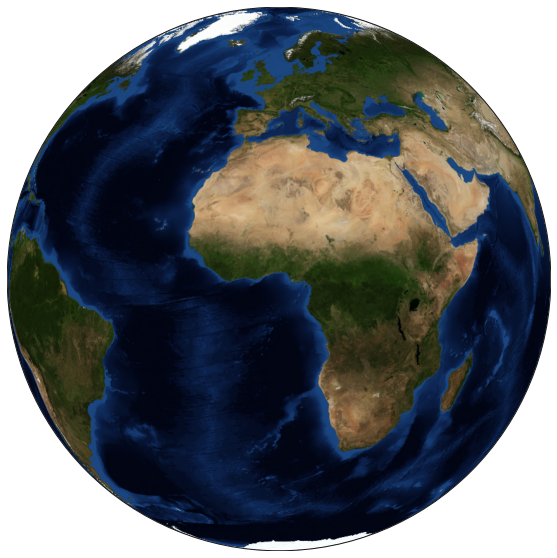

In [2]:
plt.figure(figsize=(10, 10))

# lon_0, lat_0 are the center point of the projection.
m = Basemap(projection='ortho',lat_0=5, 
            lon_0=3,resolution=None)

m.bluemarble(scale=0.5)
plt.show();

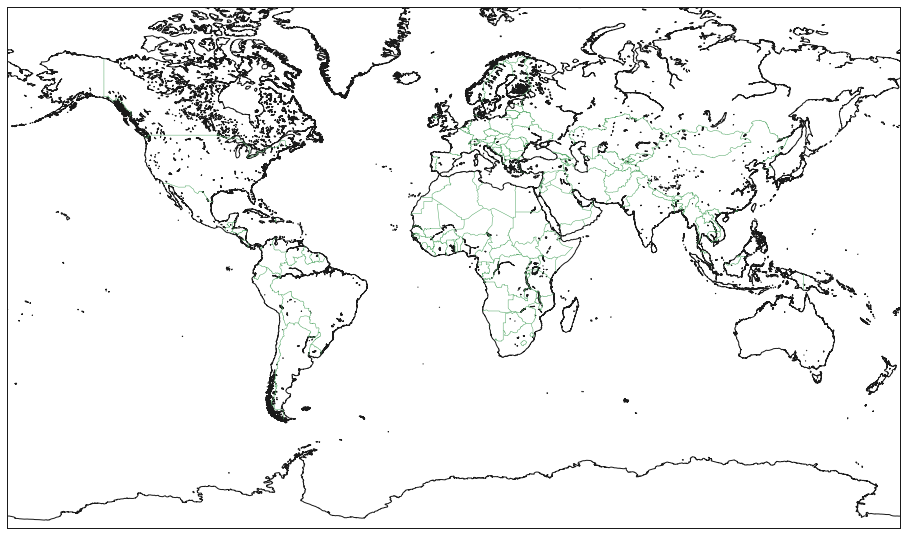

In [4]:
plt.figure(figsize=(16,12))
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left 
# and upper right corners of the map.
# resolution = 'i' means intermediate resolution coastlines.
m = Basemap(projection = 'mill', llcrnrlat = -80, 
            urcrnrlat = 80, llcrnrlon = -180, 
            urcrnrlon = 180, resolution = 'i')

m.drawcoastlines()
m.drawcountries(color='g')
m.drawmapboundary(fill_color='white')
plt.show();

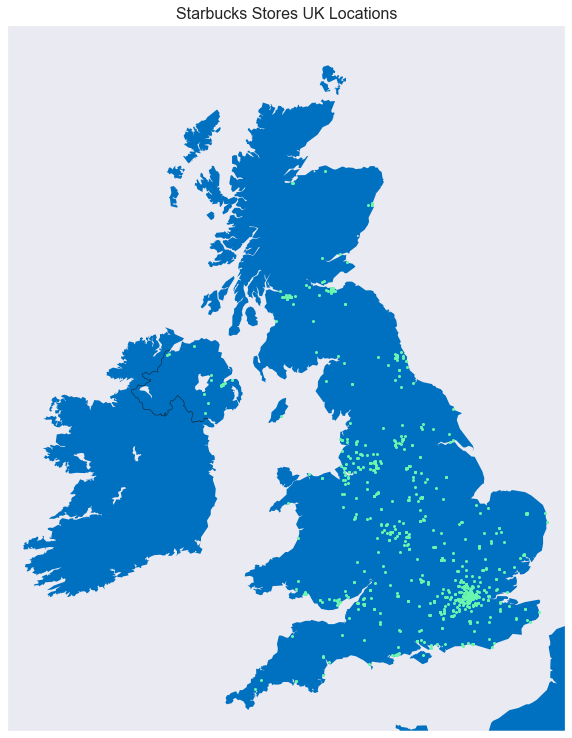

In [12]:
plt.figure(figsize=(10, 20))

m = Basemap(llcrnrlon=-10.5,llcrnrlat=49.5,urcrnrlon=3.5,
            urcrnrlat=59.5,resolution='i',projection='cass',
            lon_0=-4.36,lat_0=54.7)

m.drawcountries()
m.fillcontinents(color='#0070C0')

x, y = m(list(GB["Longitude"].astype(float)), 
         list(GB["Latitude"].astype(float)))
m.plot(x, y, 'o',color='#6AF6AD', markersize=2)

plt.title("Starbucks Stores UK Locations",fontsize=16)
plt.show();